<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/fruits_quality_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Given: Fruits data

To build a ML model to predict if the fruit is good or bad

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/fruit_quality_midsem_jt312.csv')
df.head()

,Unnamed: 0,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,1.850968,-2.905569,-0.681102,-1.229915,2.891594,-0.113403,1.285040,good
1,1,2.958601,0.374302,-2.620356,-0.564812,-0.208029,1.950718,1.514155,good
2,2,1.749177,NaN,-0.639736,-0.443877,NaN,-0.323230,0.215333,good
3,3,2.166383,-0.382873,-1.106467,-1.297901,0.995598,0.805686,2.077993,good
4,4,0.237406,-0.743632,1.892783,1.366007,1.265451,1.023982,1.095010,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3001 non-null   int64  
 1   Size         2708 non-null   float64
 2   Weight       2737 non-null   float64
 3   Sweetness    2717 non-null   float64
 4   Crunchiness  2741 non-null   float64
 5   Juiciness    2702 non-null   float64
 6   Ripeness     2682 non-null   float64
 7   Acidity      2723 non-null   float64
 8   Quality      3001 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 211.1+ KB


In [ ]:
df.describe()

,Unnamed: 0,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3001.000000,2708.000000,2737.000000,2717.000000,2741.000000,2702.000000,2682.000000,2723.000000
mean,1500.000000,-0.376847,-0.985078,-0.264583,0.986113,0.657907,0.308063,0.086790
std,866.458404,1.992023,1.688520,1.943670,1.473801,1.864149,1.856015,2.089963
min,0.000000,-6.905803,-6.581590,-6.359749,-6.055058,-5.544053,-5.611400,-7.010538
25%,750.000000,-1.720086,-2.070839,-1.563330,0.022732,-0.612428,-0.982249,-1.350580
50%,1500.000000,-0.318051,-1.010217,-0.326563,1.030750,0.737262,0.367703,0.051274
75%,2250.000000,1.023035,0.103931,0.971279,1.956591,1.929817,1.540353,1.504642
max,3000.000000,6.406367,5.790714,6.374916,7.561485,7.364403,6.346445,7.193374


In [ ]:
#To see if there are any missing values in this data or not
df.isnull().sum()

,0
Unnamed: 0,0
Size,293
Weight,264
Sweetness,284
Crunchiness,260
Juiciness,299
Ripeness,319
Acidity,278
Quality,0


In [ ]:
df.drop(df.columns[0], axis = 1, inplace = True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,1.850968,-2.905569,-0.681102,-1.229915,2.891594,-0.113403,1.285040,good
1,2.958601,0.374302,-2.620356,-0.564812,-0.208029,1.950718,1.514155,good
2,1.749177,NaN,-0.639736,-0.443877,NaN,-0.323230,0.215333,good
3,2.166383,-0.382873,-1.106467,-1.297901,0.995598,0.805686,2.077993,good
4,0.237406,-0.743632,1.892783,1.366007,1.265451,1.023982,1.095010,good


<Axes: >

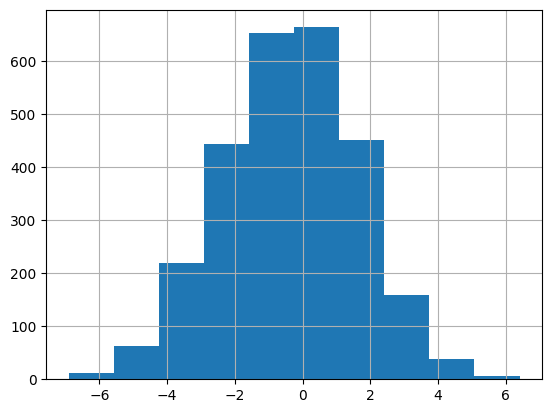

In [ ]:
df['Size'].hist()

<Axes: >

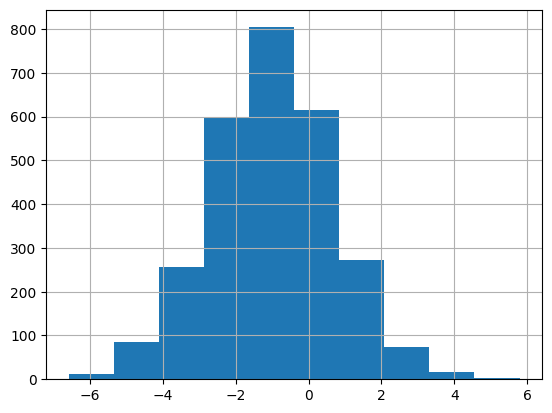

In [ ]:
df['Weight'].hist()

<Axes: >

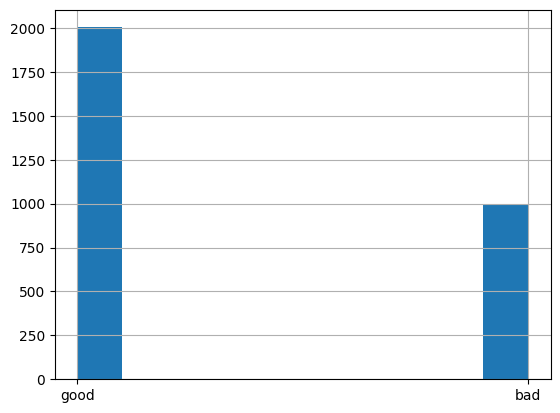

In [ ]:
df['Quality'].hist()

In [ ]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [ ]:
#To do encoding for Quality column good = 1 and bad = 0
df['Quality']= df['Quality'].replace(['good', 'bad'], [1,0])
df['Quality'].unique()




<ipython-input-12-190eb9acbea7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality']= df['Quality'].replace(['good', 'bad'], [1,0])


array([1, 0])

In [ ]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,1.850968,-2.905569,-0.681102,-1.229915,2.891594,-0.113403,1.285040,1
1,2.958601,0.374302,-2.620356,-0.564812,-0.208029,1.950718,1.514155,1
2,1.749177,NaN,-0.639736,-0.443877,NaN,-0.323230,0.215333,1
3,2.166383,-0.382873,-1.106467,-1.297901,0.995598,0.805686,2.077993,1
4,0.237406,-0.743632,1.892783,1.366007,1.265451,1.023982,1.095010,1


### Therefore all values are numerical now!

#Train Test split

In [ ]:
#To split the data into train and test
from sklearn.model_selection import train_test_split
x = df.drop('Quality', axis = 1)
y = df['Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=42 )


In [ ]:
#import sklearn libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#To create pipeline:

#Numerical preprocessor:
numerical_preprocessor = Pipeline([
    ('impute', SimpleImputer(strategy="median"))
    ,('scale', MinMaxScaler(feature_range=(-1, 1)))
])


In [ ]:
type(numerical_preprocessor), isinstance(numerical_preprocessor, Pipeline), numerical_preprocessor

(sklearn.pipeline.Pipeline,
 True,
 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('scale', MinMaxScaler(feature_range=(-1, 1)))]))

In [ ]:
x_preprocessed = numerical_preprocessor.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression
full_pipeline = Pipeline([
    ('numerical preprocessor', numerical_preprocessor),
    ('linear_regression', LinearRegression())
])

In [ ]:
full_pipeline

Pipeline(steps=[('numerical preprocessor',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('scale',
                                  MinMaxScaler(feature_range=(-1, 1)))])),
                ('linear_regression', LinearRegression())])

In [ ]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('numerical preprocessor',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('scale',
                                  MinMaxScaler(feature_range=(-1, 1)))])),
                ('linear_regression', LinearRegression())])

In [ ]:
y_pred = full_pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
#Test RMSE
lr_test_rmse = rmse(y_test, y_pred)
lr_test_rmse

0.4056397805574264

In [ ]:
#Train RMSE:
y_train_pred = full_pipeline.predict(x_train)
lr_train_rmse = rmse(y_train, y_train_pred)
lr_train_rmse

0.408307059841791

###RMSE is almost the same for both Train as well as test data

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
-cross_val_score(full_pipeline, x, y, scoring="neg_root_mean_squared_error", cv=10)

array([0.37858106, 0.40278423, 0.43236804, 0.40575504, 0.40429926,
       0.40364669, 0.42022033, 0.40267238, 0.40861384, 0.42675354])

In [ ]:
full_pipeline[:-1].get_feature_names_out()

array(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity'], dtype=object)

In [ ]:
full_pipeline[:-1].get_params()

{'memory': None,
 'steps': [('numerical preprocessor',
   Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                   ('scale', MinMaxScaler(feature_range=(-1, 1)))]))],
 'transform_input': None,
 'verbose': False,
 'numerical preprocessor': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('scale', MinMaxScaler(feature_range=(-1, 1)))]),
 'numerical preprocessor__memory': None,
 'numerical preprocessor__steps': [('impute',
   SimpleImputer(strategy='median')),
  ('scale', MinMaxScaler(feature_range=(-1, 1)))],
 'numerical preprocessor__transform_input': None,
 'numerical preprocessor__verbose': False,
 'numerical preprocessor__impute': SimpleImputer(strategy='median'),
 'numerical preprocessor__scale': MinMaxScaler(feature_range=(-1, 1)),
 'numerical preprocessor__impute__add_indicator': False,
 'numerical preprocessor__impute__copy': True,
 'numerical preprocessor__impute__fill_value': None,
 'numerical preprocessor__impute__keep_emp

In [ ]:
full_pipeline.set_params(linear_regression__fit_intercept=False, linear_regression__positive=True)

Pipeline(steps=[('numerical preprocessor',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('scale',
                                  MinMaxScaler(feature_range=(-1, 1)))])),
                ('linear_regression',
                 LinearRegression(fit_intercept=False, positive=True))])

In [ ]:
#R2 score:
from sklearn.metrics import r2_score
r2_test= r2_score(y_test, y_pred)

print("R2 score for test: ", r2_test)

R2 score for test:  0.26053567530284105


In [ ]:
#R2 score for train data:
r2_train = r2_score(y_train, y_train_pred)
print("R2 score for train: ", r2_train)


R2 score for train:  0.2477673999557659


In [ ]:
#To apply logistic regression:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('numerical preprocessor', numerical_preprocessor),
    ('logistic_regression', LogisticRegression())
])

lr_pipeline.fit(x_train, y_train)

y_pred = lr_pipeline.predict(x_test)

RMSE_lr = rmse(y_test, y_pred)
RMSE_lr

0.4757781487950438

In [ ]:
#Train error
y_train_pred = lr_pipeline.predict(x_train)
RMSE_lr_train = rmse(y_train, y_train_pred)
RMSE_lr_train

0.4760952285695233

In [ ]:
#R2 score:
r2_test= r2_score(y_test, y_pred)

print("R2 score for test: ", r2_test)

R2 score for test:  -0.0172908366533866


In [ ]:
#R2 score for train data:
r2_train = r2_score(y_train, y_train_pred)
print("R2 score for train: ", r2_train)


R2 score for train:  -0.022741857281387112
